In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Note_books/Latest Covid-19 India Status.csv")

In [74]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7525,14,7382,129,0.19,98.10,1.71
1,Andhra Pradesh,1952513,22358,1916914,13241,1.15,98.18,0.68
2,Arunachal Pradesh,45703,4465,41025,213,9.77,89.76,0.47
3,Assam,557437,15726,536597,5114,2.82,96.26,0.92
4,Bihar,724390,530,714223,9637,0.07,98.60,1.33


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [76]:
df["State/UTs"].value_counts()

West Bengal                                 1
Delhi                                       1
Assam                                       1
Himachal Pradesh                            1
Sikkim                                      1
Kerala                                      1
Chhattisgarh                                1
Gujarat                                     1
Madhya Pradesh                              1
Meghalaya                                   1
Puducherry                                  1
Jharkhand                                   1
Tamil Nadu                                  1
Maharashtra                                 1
Rajasthan                                   1
Bihar                                       1
Goa                                         1
Lakshadweep                                 1
Jammu and Kashmir                           1
Andaman and Nicobar                         1
Dadra and Nagar Haveli and Daman and Diu    1
Karnataka                         

In [77]:
df.replace("Dadra and Nagar Haveli and Daman and Diu","Daman And Diu",inplace=True)

In [78]:
df_copy=df.copy()

# Normalizaion

Let's see wich columns do we want to normalize.

In [79]:
df["Total Cases"].describe()

count    3.600000e+01
mean     8.714417e+05
std      1.255645e+06
min      7.525000e+03
25%      6.159075e+04
50%      4.521775e+05
75%      9.745455e+05
max      6.258079e+06
Name: Total Cases, dtype: float64

In Totel Cases coloumn differense between min and max is very high. So we want to normalize that column.

In [80]:
df["Active"].describe()

count    3.600000e+01
mean     4.599578e+04
std      2.303794e+05
min      1.400000e+01
25%      4.830000e+02
50%      1.275000e+03
75%      9.781500e+03
max      1.386262e+06
Name: Active, dtype: float64

In Active coloumn differense between min and max is very high. So we want to normalize that column.

In [81]:
df["Discharged"].describe()

count    3.600000e+01
mean     8.484205e+05
std      1.213779e+06
min      7.382000e+03
25%      5.952950e+04
50%      4.390575e+05
75%      9.543658e+05
max      6.029817e+06
Name: Discharged, dtype: float64

In Discharged coloumn differense between min and max is very high. So we want to normalize that column.

In [82]:
df["Active Ratio (%)"].describe()

count    36.000000
mean      2.665833
std       4.985038
min       0.020000
25%       0.122500
50%       0.750000
75%       2.040000
max      24.950000
Name: Active Ratio (%), dtype: float64

In Active Ratio (%) coloumn differense between min and max is very high. So we want to normalize that column.

In [83]:
df["Discharge Ratio (%)"].describe()

count    36.000000
mean     96.074722
std       4.877221
min      74.610000
25%      96.327500
50%      97.915000
75%      98.602500
max      99.510000
Name: Discharge Ratio (%), dtype: float64

In Active Ratio (%) coloumn differense between min and max is very Small. So we don't want to normalize that column.

In [84]:
df["Death Ratio (%)"].describe()

count    36.000000
mean      1.260000
std       0.565241
min       0.040000
25%       0.935000
50%       1.330000
75%       1.617500
max       2.720000
Name: Death Ratio (%), dtype: float64

In Death Ratio (%) coloumn differense between min and max is very high. So we want to normalize that column.


**Lets's Normalize the coloumn that we want**

In [85]:
def normalize(coloumn):
    df_mean = coloumn.mean()
    df_std = coloumn.std()
    return (coloumn-df_mean)/df_std

In [86]:
features = {'Total Cases','Active','Discharged','Deaths','Active Ratio (%)','Death Ratio (%)'}

for feature in features:
    df_copy[feature] = normalize(df_copy[feature])

In [137]:
df_copy.head(20)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,-0.688026,-0.199592,-0.692909,-0.511487,-0.496653,98.10,7.961209e-01
1,Andhra Pradesh,0.860969,-0.102604,0.880303,0.069023,-0.304077,98.18,-1.026111e+00
2,Arunachal Pradesh,-0.657621,-0.180271,-0.665192,-0.507768,1.425098,89.76,-1.397634e+00
3,Assam,-0.250074,-0.131391,-0.256903,-0.290785,0.030926,96.26,-6.015136e-01
4,Bihar,-0.117112,-0.197352,-0.110562,-0.090537,-0.520725,98.60,1.238410e-01
5,Chandigarh,-0.644704,-0.199513,-0.648668,-0.481381,-0.524737,98.64,8.845788e-02
6,Chhattisgarh,0.103210,-0.187546,0.112308,0.080977,-0.478599,98.37,1.592242e-01
7,Daman And Diu,-0.685548,-0.199444,-0.690270,-0.517021,-0.444497,99.51,-2.158372e+00
8,Delhi,0.449492,-0.197104,0.462848,0.591447,-0.526743,98.22,8.491956e-01
9,Goa,-0.558299,-0.194279,-0.562185,-0.378800,-0.388329,97.44,1.008420e+00


# Visualization

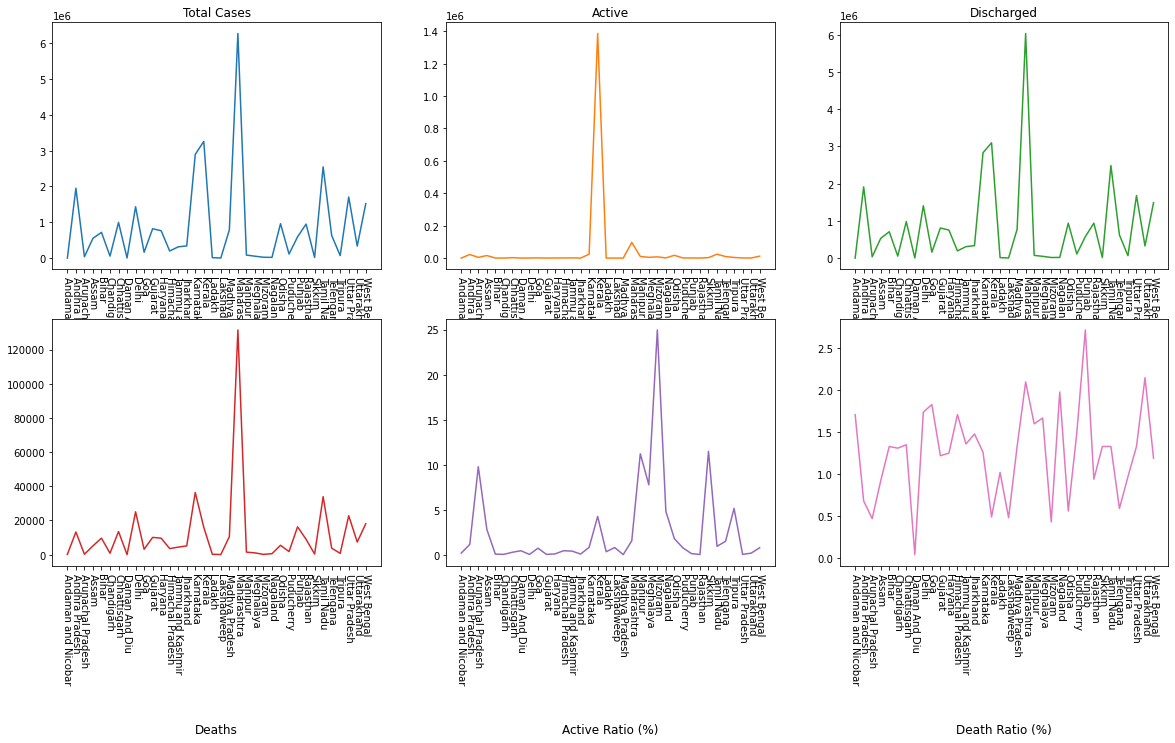

In [130]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.plot(df_copy["State/UTs"],df["Total Cases"],label="Total Cases")
plt.xticks(rotation=270)
plt.title("Total Cases")

plt.subplot(2,3,2)
plt.plot(df_copy["State/UTs"],df["Active"],'tab:orange')
plt.xticks(rotation=270)
plt.title("Active")

plt.subplot(2,3,3)
plt.plot(df_copy["State/UTs"],df["Discharged"],'tab:green')
plt.xticks(rotation=270)
plt.title("Discharged")

plt.subplot(2,3,4)
plt.plot(df_copy["State/UTs"],df["Deaths"],'tab:red')
plt.xticks(rotation=270)
plt.title("Deaths",y=-0.7)

plt.subplot(2,3,5)
plt.plot(df_copy["State/UTs"],df["Active Ratio (%)"],'tab:purple')
plt.xticks(rotation=270)
plt.title("Active Ratio (%)",y=-0.7)

plt.subplot(2,3,6)
plt.plot(df_copy["State/UTs"],df["Death Ratio (%)"],'tab:pink')
plt.xticks(rotation=270)
plt.title("Death Ratio (%)",y=-0.7)


plt.show()

According to this graphs, Maharashtra has a high number of covid instances. In addition, there are more than 120000 death in Maharashtra state. However, Nagaland has the highest active percentage, while Kerala has the highest number of active cases.


Let's how about the Discharge Ratio in India 

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


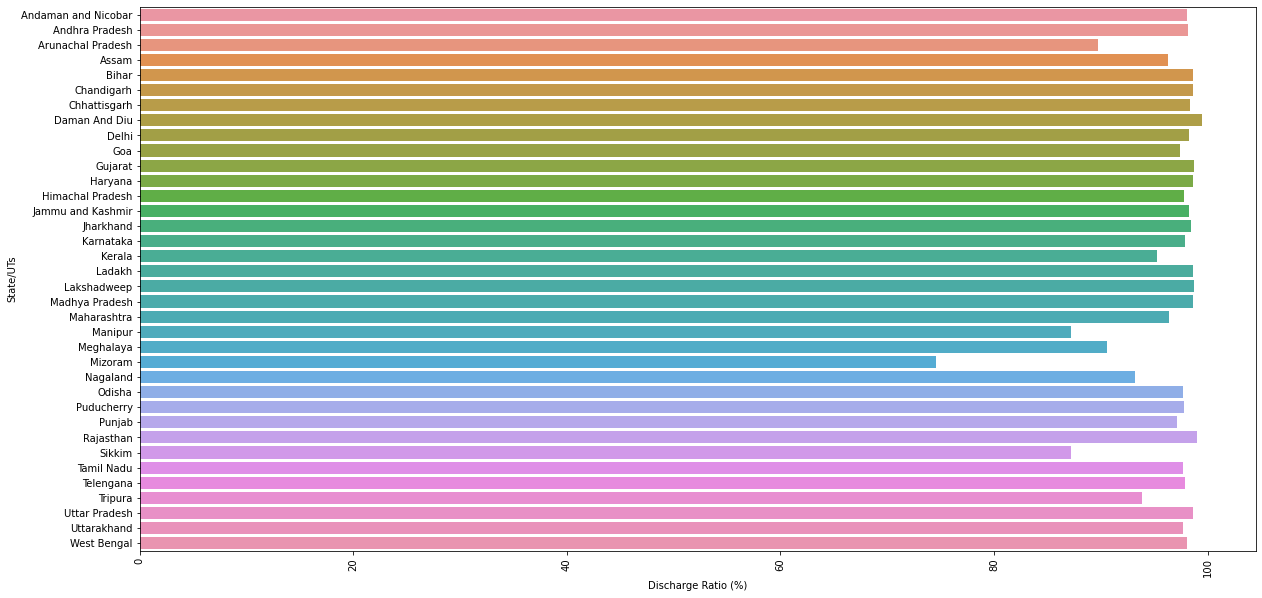

In [132]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(df_copy["Discharge Ratio (%)"],df_copy["State/UTs"])
plt.show()

In lot of states Discharge ratio is very good but in Mizoram Discharge ratio is smaller than other states.  

<AxesSubplot:>

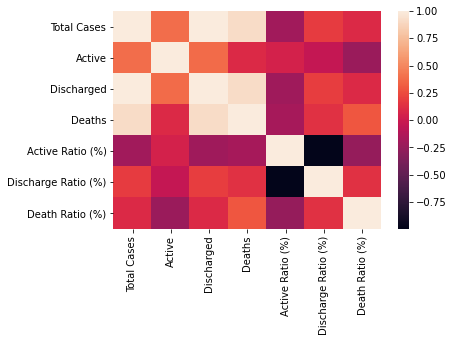

In [133]:
sns.heatmap(df_copy.corr())

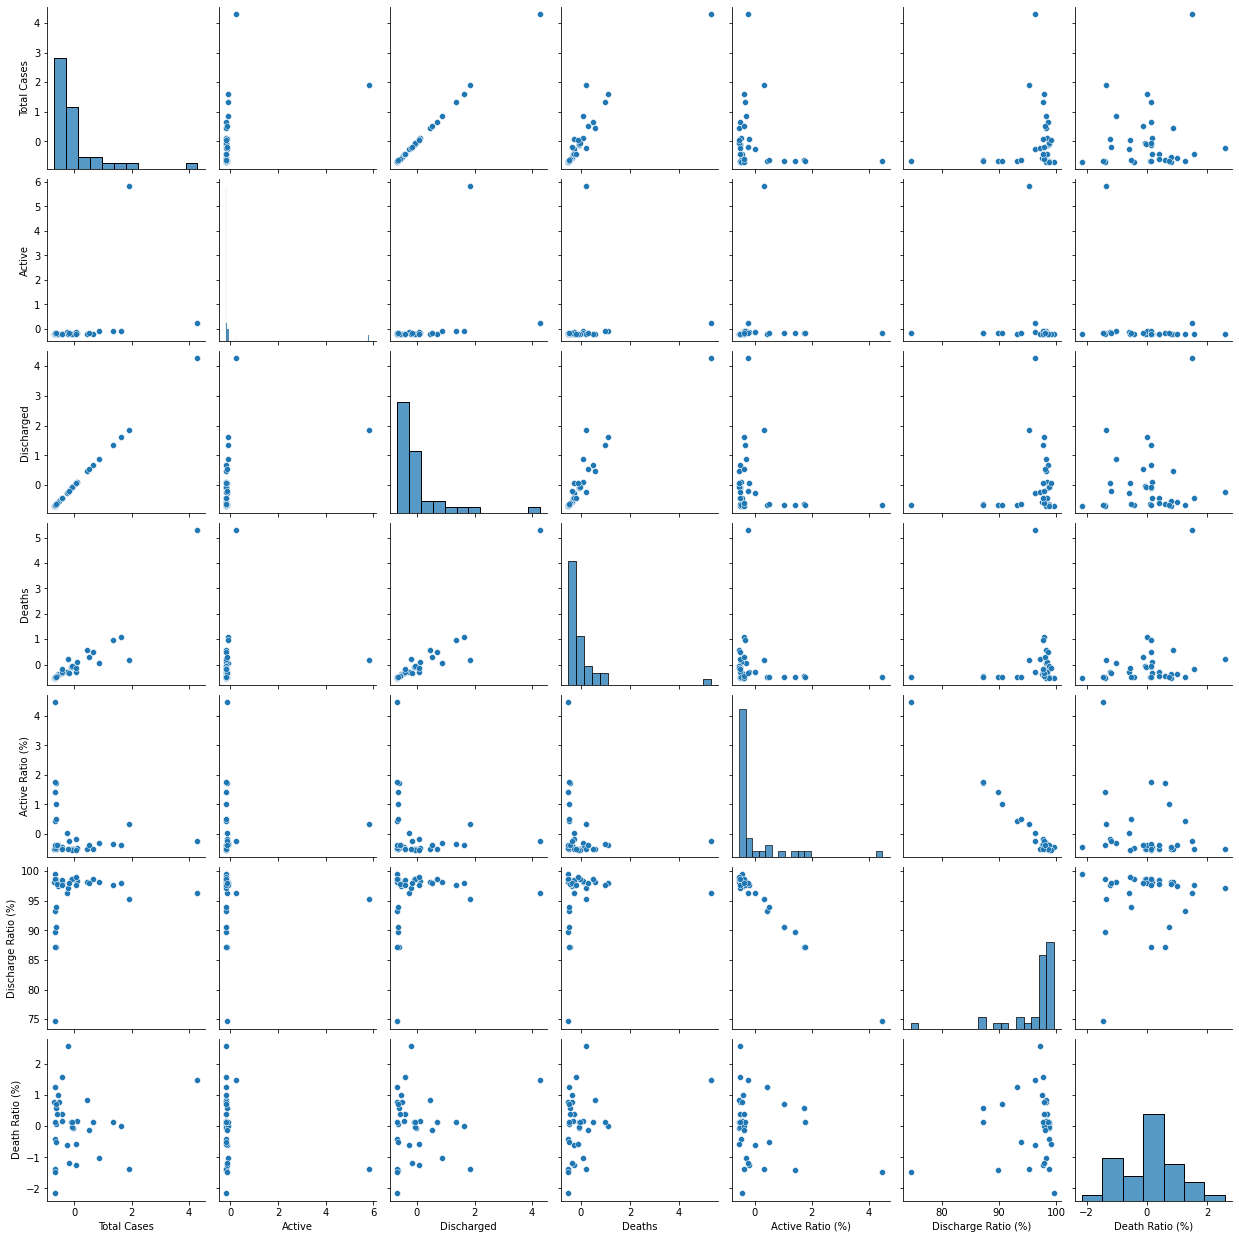

In [134]:
sns.pairplot(df_copy)